# Laboratorio 4

- [Mónica Salvatierra - 22249](https://github.com/alee2602)
- [Paula Barillas - 22764](https://github.com/paulabaal12)
- [Derek Arreaga - 22537](https://github.com/FabianKel)

#####  LINK DE REPOSITORIO
https://github.com/FabianKel/LAB4-IA

## Task 1 - Preguntas Teóricas

1. Explique con sus propias palabras, qué son los grafos computaciones y cuál es su importancia para el
cálculo de gradientes en aplicaciones como backpropagation

Gráfico acíclico dirigido, para representar la expresión matemática final y cada nodo representa subexpresiones intermedias.

* Ayuda a simplificar el proceso
* Ayuda a obtener más información de la naturaleza y estructura modular de los cálculos de gradientes

2. Detalle cuales son los componentes y pasos que conforman una red neuronal. Con esto en mente, ¿cómo
mejoraría el perceptrón que hizo en el laboratorio pasado?

**Componentes:**
* a

3. Investigue y explique cómo se selecciona el valor K usando el método de la silueta para el algoritmo de K-
Means. Explique las fórmulas (ecuaciones) que lo componen así como las asumpciones, si hay.

4. Investigue sobre Principal Component Analysis (PCA) y responda respecto a algoritmos como K-Means:
a. ¿Cómo podría ayudarle a mejorar la calidad de sus clusters cuando se usa K-Means?

## Task 2 - Ejercicios Prácticos

### Task 2.1 - K-Means y Segmentación de Clientes de Banco

### **Importar las librerías a utilizar**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler

### **Leer archivo de datos**

In [10]:
data = pd.read_csv("bank_transactions.csv")

### **Obtener las primeros 15 datos**

In [11]:
data.head(15)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.00
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.00
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.00
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.00
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50
5,T6,C1536588,8/10/72,F,ITANAGAR,53609.20,2/8/16,173940,676.00
6,T7,C7126560,26/1/92,F,MUMBAI,973.46,2/8/16,173806,566.00
7,T8,C1220223,27/1/82,M,MUMBAI,95075.54,2/8/16,170537,148.00
8,T9,C8536061,19/4/88,F,GURGAON,14906.96,2/8/16,192825,833.00
9,T10,C6638934,22/6/84,M,MUMBAI,4279.22,2/8/16,192446,289.11


In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB
None


### **Exploración de datos**

In [18]:
print(data.describe())
print(data.isnull().sum())

       TransactionID    CustomerID    CustGender  CustLocation  \
count   1.048567e+06  1.048567e+06  1.048567e+06  1.048567e+06   
mean    5.242830e+05  4.420843e+05  7.332216e-01  4.125395e+03   
std     3.026954e+05  2.553189e+05  4.493374e-01  2.385674e+03   
min     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%     2.621415e+05  2.210755e+05  0.000000e+00  2.075000e+03   
50%     5.242830e+05  4.420960e+05  1.000000e+00  4.132000e+03   
75%     7.864245e+05  6.631645e+05  1.000000e+00  5.792000e+03   
max     1.048566e+06  8.842640e+05  3.000000e+00  9.355000e+03   

       CustAccountBalance  TransactionTime  TransactionAmount (INR)  
count        1.046198e+06     1.048567e+06             1.048567e+06  
mean         1.378708e-17     1.916886e-16            -2.306660e-17  
std          1.000000e+00     1.000000e+00             1.000000e+00  
min         -1.363327e-01    -3.064415e+00            -2.394521e-01  
25%         -1.307546e-01    -6.448761e-01            -

#### Task 2.1.1 - K-Means

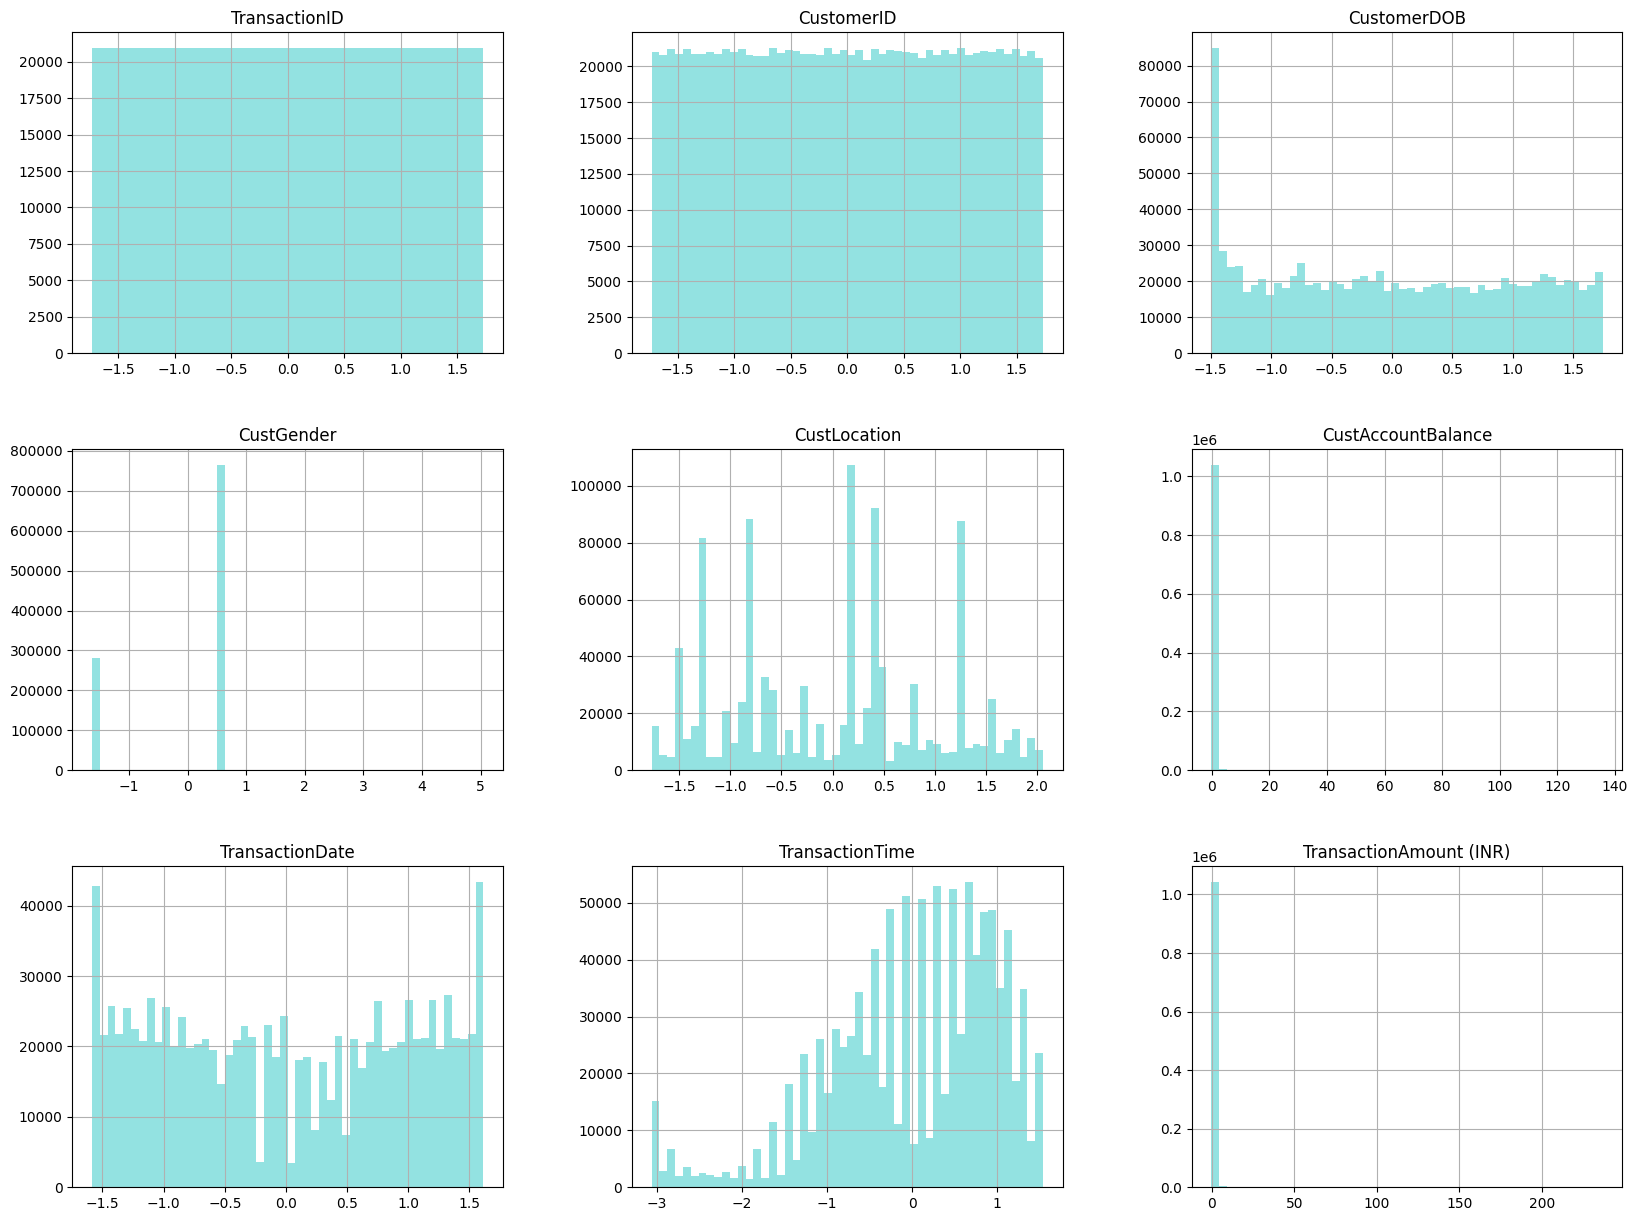

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encoding de las variables categóricas
categorical_columns = ['CustomerDOB', 'TransactionDate']
le = LabelEncoder()
for column in categorical_columns:
    data[column] = le.fit_transform(data[column])


# Escalar las variables numéricas
numeric_features = data.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Selección de variables
X = data[numeric_features]

# Visualización de la distribución de las variables
data.hist(bins=50, figsize=(20, 15), color='#bff7f2')
plt.show()


### Task 2.2 - Mixture Modelos y Segmentación de Clientes de Banco

#### Task 2.2.1 - Mixture Models